In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import os
import shutil

In [3]:
df = pd.read_csv('driver_imgs_list.csv')
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [4]:
data_dir = "train"
train_dir = "train_split"
test_dir = "test_split"

In [5]:
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [6]:
def split_data(data_dir, train_dir, test_dir, test_size=0.2):
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
            
            train_class_dir = os.path.join(train_dir, class_dir)
            test_class_dir = os.path.join(test_dir, class_dir)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)
            
            for image in train_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(train_class_dir, image))
            for image in test_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(test_class_dir, image))

In [7]:
split_data(data_dir, train_dir, test_dir, test_size=0.2)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4490 images belonging to 10 classes.


In [11]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [13]:
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

In [14]:
class_weights

{0: 0.9007533902561526,
 1: 0.9891891891891892,
 2: 0.967835941716136,
 3: 0.9559701492537314,
 4: 0.9641935483870968,
 5: 0.9699296917252569,
 6: 0.9641935483870968,
 7: 1.1201748906933167,
 8: 1.1736910994764398,
 9: 1.0530827950675279}

In [15]:
def count_images(directory):
    class_counts = {}
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts


In [16]:
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

In [17]:
train_counts, test_counts


({'c0': 1991,
  'c1': 1813,
  'c2': 1853,
  'c3': 1876,
  'c4': 1860,
  'c5': 1849,
  'c6': 1860,
  'c7': 1601,
  'c8': 1528,
  'c9': 1703},
 {'c0': 498,
  'c1': 454,
  'c2': 464,
  'c3': 470,
  'c4': 466,
  'c5': 463,
  'c6': 465,
  'c7': 401,
  'c8': 383,
  'c9': 426})

In [18]:
labels = list(train_counts.keys())
train_values = list(train_counts.values())
test_values = list(test_counts.values())

In [19]:
train_values

[1991, 1813, 1853, 1876, 1860, 1849, 1860, 1601, 1528, 1703]

In [20]:
test_values

[498, 454, 464, 470, 466, 463, 465, 401, 383, 426]

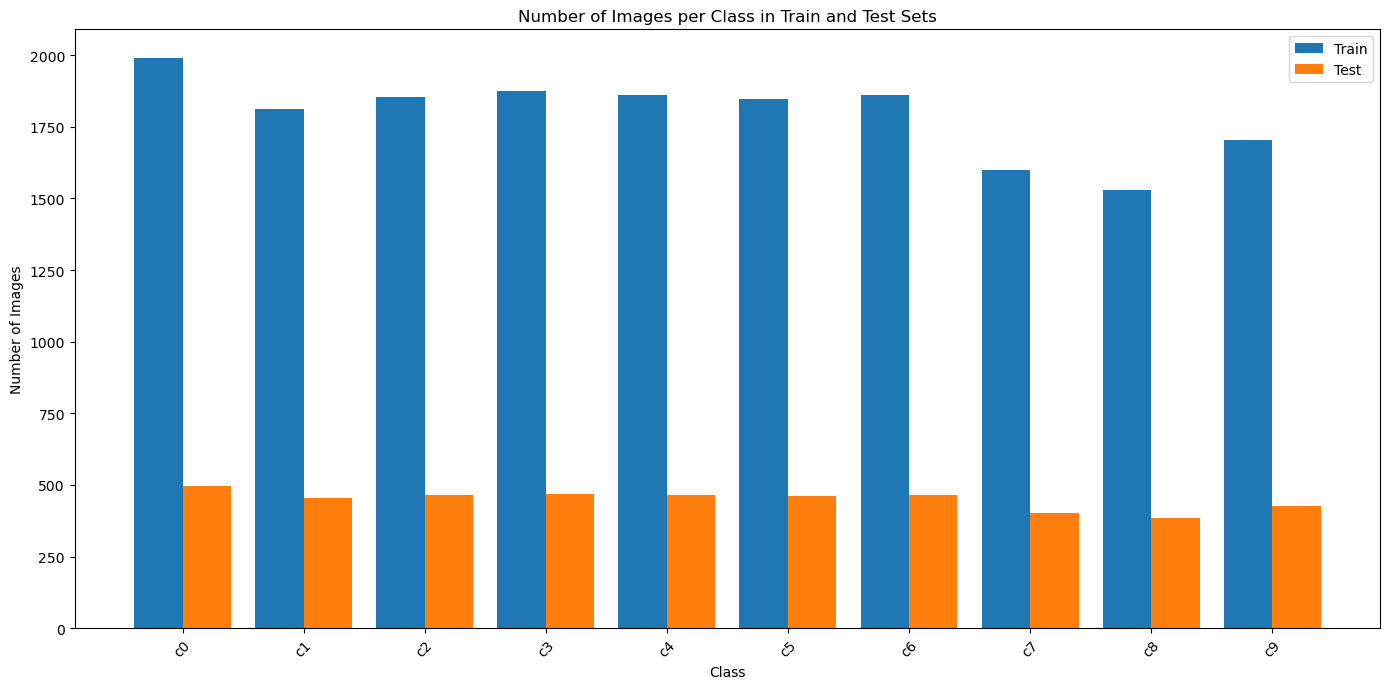

In [21]:
x = range(len(labels))

plt.figure(figsize=(14, 7))
plt.bar([i - 0.2 for i in x], train_values, width=0.4, label='Train')
plt.bar([i + 0.2 for i in x], test_values, width=0.4, label='Test')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Train and Test Sets')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\ruqsa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    class_weight=class_weights
)

c:\Users\ruqsa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 946s 2s/step - accuracy: 0.2424 - loss: 3.7226 - val_accuracy: 0.6744 - val_loss: 1.9383
Epoch 2/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 825s 1s/step - accuracy: 0.5471 - loss: 2.1267 - val_accuracy: 0.8606 - val_loss: 1.2444
Epoch 3/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 415s 740ms/step - accuracy: 0.6816 - loss: 1.6272 - val_accuracy: 0.9332 - val_loss: 0.8894
Epoch 4/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 391s 697ms/step - accuracy: 0.7627 - loss: 1.2740 - val_accuracy: 0.9403 - val_loss: 0.7314
Epoch 5/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 386s 687ms/step - accuracy: 0.8084 - loss: 1.0421 - val_accuracy: 0.9697 - val_loss: 0.5694
Epoch 6/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 625s 1s/step - accuracy: 0.8458 - loss: 0.8721 - val_accuracy: 0.9686 - val_loss: 0.5172
Epoch 7/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 442s 787ms/step - accuracy: 0.8717 - loss: 0.7692 - val_accuracy: 0.9715 - val_loss: 0.4778
Epoch 8/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 385s 687ms/step - accuracy: 0.8869 - loss: 0.

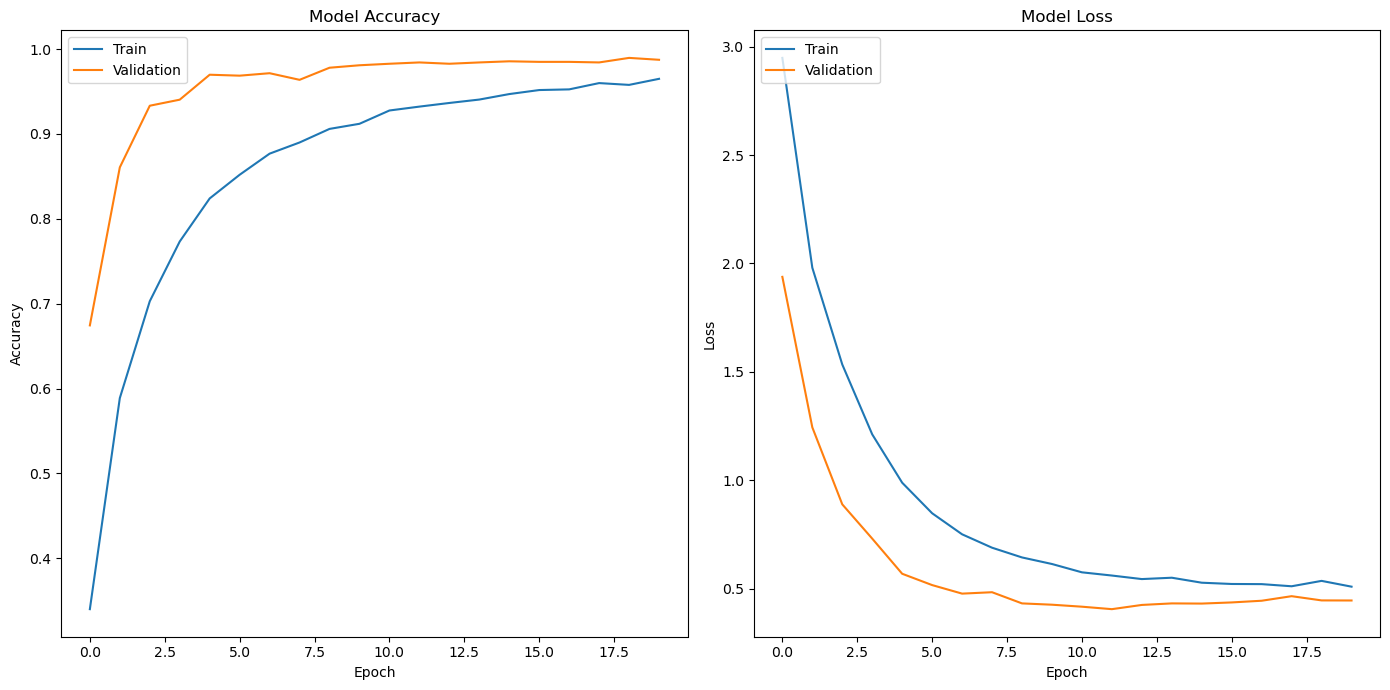

In [25]:
plt.figure(figsize=(14, 7))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [26]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.9924 - loss: 0.4223
Test accuracy: 0.9873051047325134
Test loss: 0.4461599886417389


In [27]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step


In [28]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[495   0   0   1   2   0   0   0   0   0]
 [  1 453   0   0   0   0   0   0   0   0]
 [  0   0 460   0   0   1   2   0   0   1]
 [  5   0   0 465   0   0   0   0   0   0]
 [  0   0   0   2 464   0   0   0   0   0]
 [  5   0   0   0   1 457   0   0   0   0]
 [  0   1   0   0   1   0 461   0   2   0]
 [  1   0   0   0   0   0   0 396   2   2]
 [  4   0   0   0   3   0   3   1 367   5]
 [  6   0   0   0   2   0   0   0   3 415]]


In [29]:
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          c0       0.96      0.99      0.98       498
          c1       1.00      1.00      1.00       454
          c2       1.00      0.99      1.00       464
          c3       0.99      0.99      0.99       470
          c4       0.98      1.00      0.99       466
          c5       1.00      0.99      0.99       463
          c6       0.99      0.99      0.99       465
          c7       1.00      0.99      0.99       401
          c8       0.98      0.96      0.97       383
          c9       0.98      0.97      0.98       426

    accuracy                           0.99      4490
   macro avg       0.99      0.99      0.99      4490
weighted avg       0.99      0.99      0.99      4490



In [30]:
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy Score: {accuracy}')
precision = precision_score(true_classes, predicted_classes, average='weighted')
print(f'Precision: {precision}')

Accuracy Score: 0.987305122494432
Precision: 0.9874595618584379


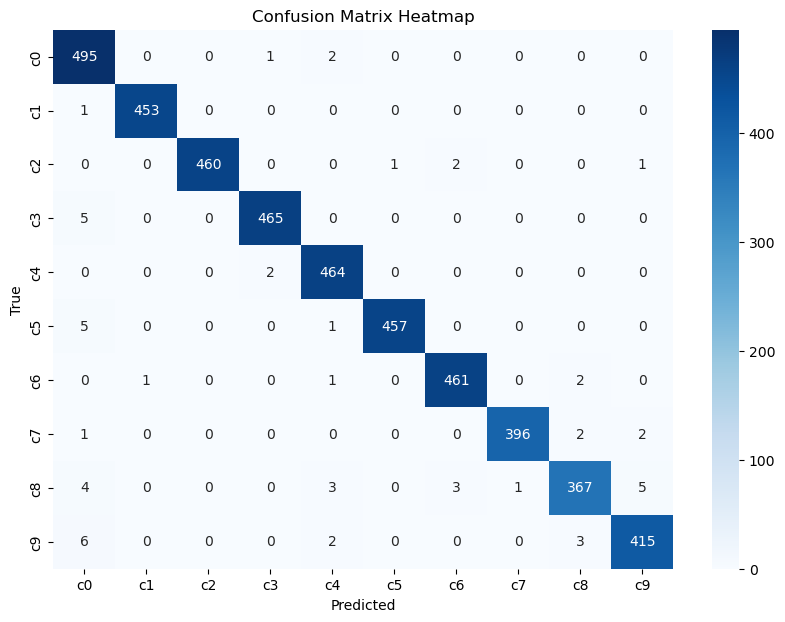

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [32]:
model.save('best_model.keras')